In [3]:
import ragas

print(ragas.__version__)

0.2.2.dev9+g8efe80d


In [46]:
import os

# os.environ["OPENAI_API_KEY"] = "you api key"


In [47]:
from langchain_openai import ChatOpenAI 

llm = ChatOpenAI(
    model="gpt-4o-mini"
    )

In [48]:
from langchain_openai import OpenAIEmbeddings

embeddingModel = OpenAIEmbeddings(
    model="text-embedding-3-large",
    # With the `text-embedding-3` class
    # of models, you can specify the size
    # of the embeddings you want returned.
    dimensions=1536 #
)

In [49]:
from langchain.document_loaders import WebBaseLoader
 
urls = "https://baike.baidu.com/item/恐龙/139019"
loader = WebBaseLoader(urls)
docs = loader.load()
 
docs 

[Document(page_content='恐龙（一类主要生活在中生代的蜥形纲动物）_百度百科 网页新闻贴吧知道网盘图片视频地图文库资讯采购百科百度首页登录注册进入词条全站搜索帮助首页秒懂百科特色百科知识专题加入百科百科团队权威合作个人中心恐龙[kǒng lóng]播报讨论上传视频一类主要生活在中生代的蜥形纲动物展开29个同名词条收藏查看我的收藏0有用+10本词条由“科普中国”科学百科词条编写与应用工作项目 审核 。恐龙（英文名：Dinosaur），是指三角龙、现代鸟类和梁龙最近的共同祖先及其所有后代。 [1]为方便研究，恐龙可分为鸟类和非鸟恐龙。其中，非鸟恐龙只生活在中生代（三叠纪、侏罗纪和白垩纪），已于6500万年前全部灭绝。而本词条主要介绍非鸟恐龙。 [1]矫健的四肢、长长的尾巴和庞大的身躯是部分非鸟恐龙的写照。它们主要栖息于湖岸平原（或海岸平原）上的森林地或开阔地带。1841年，英国科学家理查德·欧文在研究几块样子像蜥蜴骨头化石时，认为它们是某种史前动物留下来的，并命名为恐龙，意思是“恐怖的蜥蜴”。 [15]1915年，美国加利福尼亚大学地质学家乔治·D·劳德伯克博士和R·R·莫斯博士在自贡市发现恐龙化石。 [19] [22]2022年3月，云南大学生命科学院的脊椎动物研究团队发现科氏玉溪龙，是在亚洲发现的迄今最早的有甲类恐龙。 [16]中文名恐龙别\xa0\xa0\xa0\xa0名恐怖的蜥蜴拉丁学名Dinosauria界动物界门脊索动物门亚\xa0\xa0\xa0\xa0门脊椎动物亚门纲蜥形纲亚\xa0\xa0\xa0\xa0纲双孔亚纲目鸟臀目（Ornithischuia)、蜥臀目(Saurischia)次亚纲主龙型次亚纲超\xa0\xa0\xa0\xa0目恐龙总目生存时间中晚三叠世至白垩纪末词\xa0\xa0\xa0\xa0源日本古生物学家译为恐竜目录1物种定义2名称释义3外形特征4生活习性5生长繁殖6主要分类7化石研究8灭绝原因9相关场馆物种定义播报编辑根据中国古生物学名词审定委员会给出的定义，恐龙指的是三角龙（鸟臀目）和现代鸟类（蜥臀目）最近的共同祖先的其全部后代，除鸟类外已经全部灭绝。 [1]名称释义播报编辑恐龙“恐龙”一词在西方指恐蜥（恐怖的蜥蜴），日本的古生物学家译为“恐竜”，后来流行于中国。古希腊语蜥蜴（Saurosc），特指一些巨大的有

In [50]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

In [51]:
from langchain_chroma import Chroma
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddingModel )

In [52]:
retriever = vectorstore.as_retriever()

In [53]:
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)



c:\Users\qwe11\anaconda3\envs\RagAS\Lib\site-packages\langchain\hub.py:86: DeprecationWarning: The `langchainhub sdk` is deprecated.
Please use the `langsmith sdk` instead:
  pip install langsmith
Use the `pull_prompt` method.
  res_dict = client.pull_repo(owner_repo_commit)


In [54]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# rag_chain.invoke("消費者保護法第七條所規定之責任是否為『無過失責任』？")

In [55]:
from datasets import Dataset
 
questions = ["恐龙是怎么被命名的？", 
             "恐龙怎么分类的？",
             "体型最大的是哪种恐龙?",
             "体型最长的是哪种恐龙？它在哪里被发现？",
             "恐龙采样什么样的方式繁殖？",
             "恐龙是冷血动物吗？",
             "陨石撞击是导致恐龙灭绝的原因吗？",
             "恐龙是在什么时候灭绝的？",
             "鳄鱼是恐龙的近亲吗？",
             "恐龙在英语中叫什么？"
            ]
ground_truths = [["1841年，英国科学家理查德·欧文在研究几块样子像蜥蜴骨头化石时，认为它们是某种史前动物留下来的，并命名为恐龙，意思是“恐怖的蜥蜴”。"],
                ["恐龙可分为鸟类和非鸟恐龙。"],
                 ["恐龙整体而言的体型很大。以恐龙作为标准来看，蜥脚下目是其中的巨无霸。"],
                 ["最长的恐龙是27米长的梁龙，是在1907年发现于美国怀俄明州。"],
                 ["恐龙采样产卵、孵蛋的方式繁殖。"],
                 ["恐龙是介于冷血和温血之间的动物"],
                 ["科学家最新研究显示，0.65亿年前小行星碰撞地球时间或早或晚都可能不会导致恐龙灭绝，真实灭绝原因是当时恐龙处于较脆弱的生态系统中，环境剧变易导致灭绝。"],
                 ["恐龙灭绝的时间是在距今约6500万年前，地质年代为中生代白垩纪末或新生代第三纪初。"],
                 ["鳄鱼是另一群恐龙的现代近亲，但两者关系较非鸟恐龙与鸟类远。"],
                ["1842年，英国古生物学家理查德·欧文创建了“dinosaur”这一名词。英文的dinosaur来自希腊文deinos（恐怖的）Saurosc（蜥蜴或爬行动物）。对当时的欧文来说，这“恐怖的蜥蜴”或“恐怖的爬行动物”是指大的灭绝的爬行动物（实则不是）"]]
answers = []
contexts = []
 
# Inference
for query in questions:
    answers.append(rag_chain.invoke(query))
    contexts.append([docs.page_content for docs in retriever.get_relevant_documents(query)])
 
# To dict
data = {
    "question": questions,
    "answer": answers,
    "contexts": contexts,
    "ground_truths": ground_truths,
    "reference": [" ".join(gt) if isinstance(gt, list) else gt for gt in ground_truths] 

}
 
# Convert dict to dataset
dataset = Dataset.from_dict(data)

In [ ]:
# from ragas.metrics._faithfulness import faithfulness
# from ragas.metrics._answer_relevancy import answer_relevancy
# from ragas.vancemetrics._answer_rele


In [30]:
#openai的结果
import os
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
)

 
result = evaluate(
    dataset = dataset, 
    metrics=[
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,
    ],
)
 
# df = result.to_pandas()
# df

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\_context_precision.py:147: DeprecationWarning: The function _ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextPrecisionWithReference instead.
  return await self._asco

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 
df = result.to_pandas()
df

# 創建一個 DataFrame
# df = pd.DataFrame(data)
# df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy
0,恐龙是怎么被命名的？,[恐龙（一类主要生活在中生代的蜥形纲动物）_百度百科 网页新闻贴吧知道网盘图片视频地图文库资...,恐龙的命名源于1842年，英国古生物学家理查德·欧文创造了“dinosaur”这一名词，意为...,1841年，英国科学家理查德·欧文在研究几块样子像蜥蜴骨头化石时，认为它们是某种史前动物留下...,1.000000,1.0,1.000000,0.790032
1,恐龙怎么分类的？,"[Family Diplodocidae Marsh, 1884巨龙亚科 Subfamily...",恐龙主要分为两大类：鸟臀目（Ornithischia）和蜥臀目（Saurischia）。鸟臀...,恐龙可分为鸟类和非鸟恐龙。,1.000000,1.0,1.000000,0.849313
2,体型最大的是哪种恐龙?,[[5]那些体形更小的、行动迅速的恐龙则进化出了一种在现代动物身上也可以看到的特点：薄壁长骨...,体型最大的是长颈巨龙（Giraffatitan brancai），其化石在坦桑尼亚发现，预计...,恐龙整体而言的体型很大。以恐龙作为标准来看，蜥脚下目是其中的巨无霸。,1.000000,1.0,0.833333,0.784379
3,体型最长的是哪种恐龙？它在哪里被发现？,"[Dong, 1995⊙短棘南雄龙 Nanshiungosaurus brevisinus ...",体型最长的恐龙是梁龙，长度可达27米。它的化石在1907年发现于美国怀俄明州。梁龙的化石目前...,最长的恐龙是27米长的梁龙，是在1907年发现于美国怀俄明州。,0.333333,1.0,1.000000,0.856106
4,恐龙采样什么样的方式繁殖？,[[8]鸭嘴龙类恐龙图片集粹(31张)草食性恐龙一般会有一些特殊的“装备”来对付肉食性恐龙的...,恐龙主要通过产卵的方式繁殖。科学家发现恐龙留下的巢和蛋的化石，支持了它们像现代鸟类一样孵蛋的...,恐龙采样产卵、孵蛋的方式繁殖。,1.000000,1.0,1.000000,0.840141
5,恐龙是冷血动物吗？,[[19]1993年7月，河南西峡恐龙蛋化石群的发现轰动世界。南阳盆地的恐龙蛋化石群种类多、...,恐龙并不是完全的冷血动物，而是介于冷血和温血之间的生物。研究表明，恐龙的生长速率和新陈代谢特...,恐龙是介于冷血和温血之间的动物,1.000000,1.0,1.000000,0.876895
6,陨石撞击是导致恐龙灭绝的原因吗？,[[12]这场大灭绝使得在距今约6500万年这个时间的前后，地球上生物世界的面貌发生了根本性...,陨石撞击被广泛认为是导致恐龙灭绝的一个重要原因。科学家发现了与恐龙灭绝时间线相吻合的陨石坑，...,科学家最新研究显示，0.65亿年前小行星碰撞地球时间或早或晚都可能不会导致恐龙灭绝，真实灭绝...,1.000000,1.0,1.000000,0.824857
7,恐龙是在什么时候灭绝的？,[[12]中生代的鸟类（鸟类是一种特殊恐龙）(19张)地球岩层中的生物遗迹揭示，在生物进化史...,恐龙灭绝发生在距今约6500万年前，具体时间是白垩纪末期。这次大灭绝不仅导致了恐龙的消失，还...,恐龙灭绝的时间是在距今约6500万年前，地质年代为中生代白垩纪末或新生代第三纪初。,1.000000,1.0,1.000000,0.822599
8,鳄鱼是恐龙的近亲吗？,[[19]1993年7月，河南西峡恐龙蛋化石群的发现轰动世界。南阳盆地的恐龙蛋化石群种类多、...,是的，鳄鱼是恐龙的近亲。它们和恐龙同属爬行动物的一个演化支，尽管两者的关系比恐龙与鸟类的关系...,鳄鱼是另一群恐龙的现代近亲，但两者关系较非鸟恐龙与鸟类远。,1.000000,1.0,0.750000,0.850344
9,恐龙在英语中叫什么？,[恐龙（一类主要生活在中生代的蜥形纲动物）_百度百科 网页新闻贴吧知道网盘图片视频地图文库资...,"恐龙在英语中叫做""Dinosaur""。这个词源自古希腊语，意思是“恐怖的蜥蜴”。它指的是一类...",1842年，英国古生物学家理查德·欧文创建了“dinosaur”这一名词。英文的dinosa...,1.000000,1.0,1.000000,0.895302


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

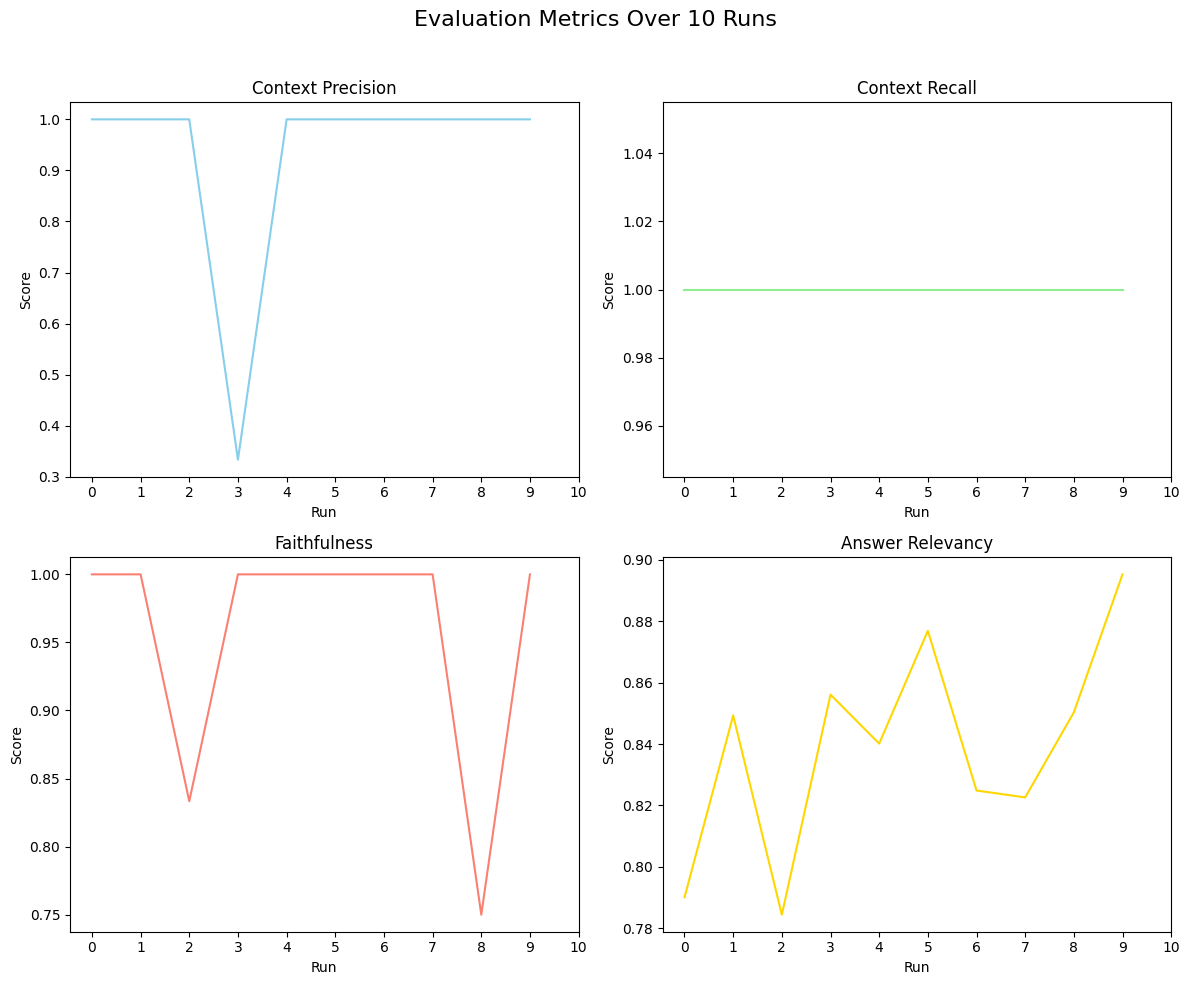

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# # 創建一個 DataFrame
# df = pd.DataFrame(data)

# 創建視覺化，顯示每個特性的分數變化
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Evaluation Metrics Over 10 Runs", fontsize=16)
# 設置 x 軸為 1 到 10
x_range = range(0, 11)
# y_range = range(1, 11)
# 繪製每個特性的折線圖
df["context_precision"].plot(ax=axes[0, 0], title="Context Precision", color="skyblue",xticks=x_range)
df["context_recall"].plot(ax=axes[0, 1], title="Context Recall", color="lightgreen",xticks=x_range)
df["faithfulness"].plot(ax=axes[1, 0], title="Faithfulness", color="salmon",xticks=x_range)
df["answer_relevancy"].plot(ax=axes[1, 1], title="Answer Relevancy", color="gold",xticks=x_range)

# 設置標籤
for ax in axes.flat:
    ax.set_xlabel("Run")
    ax.set_ylabel("Score")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

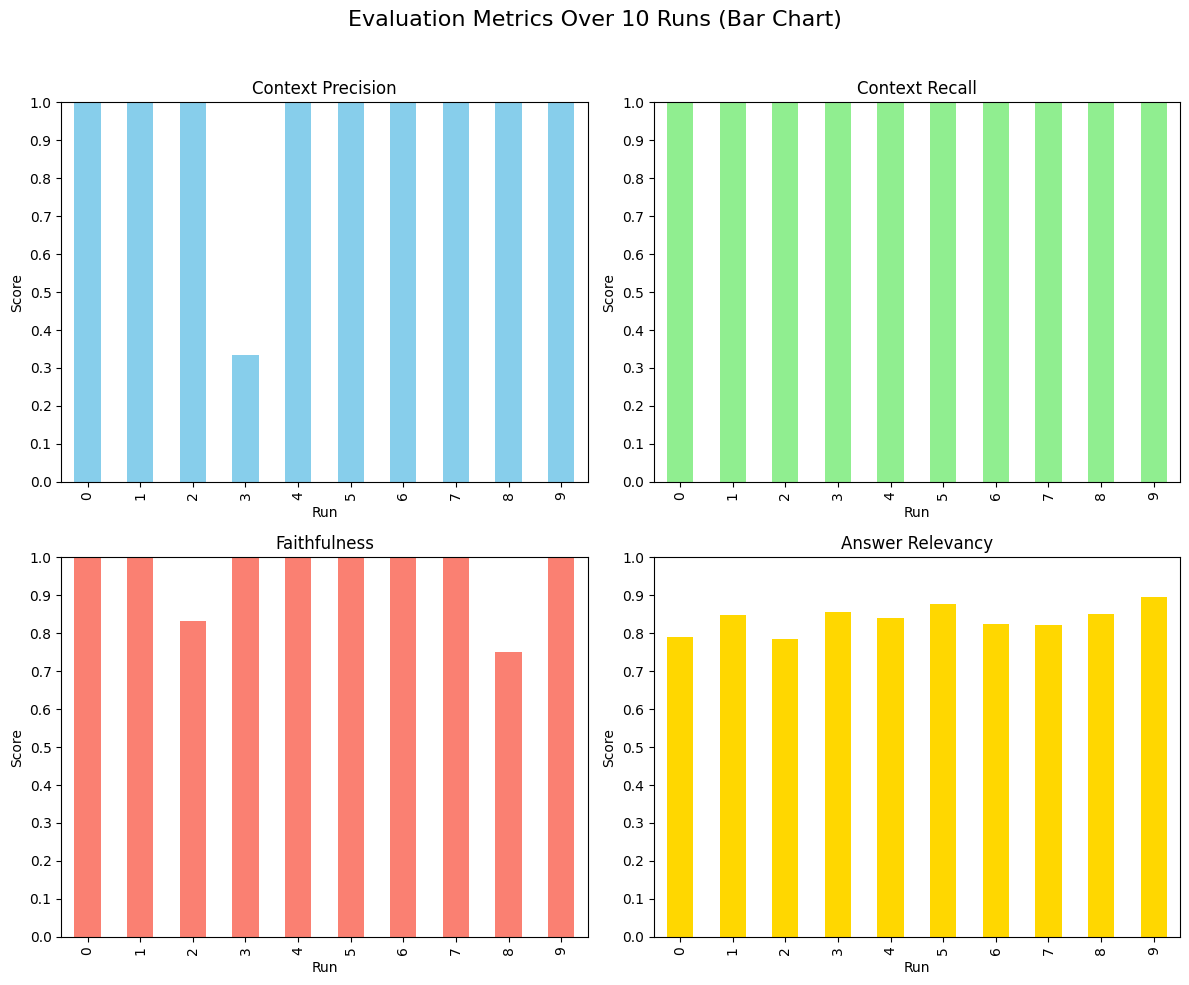

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # 生成範例數據，假設有10次評估結果
# data = {
#     "context_precision": np.random.rand(10),
#     "context_recall": np.random.rand(10),
#     "faithfulness": np.random.rand(10),
#     "answer_relevancy": np.random.rand(10),
# }

# # 創建一個 DataFrame
# df = pd.DataFrame(data)

# 創建視覺化，顯示每個特性的分數變化
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Evaluation Metrics Over 10 Runs (Bar Chart)", fontsize=16)

# 設置 x 軸為 1 到 10
x_range = range(1, 11)

# 設置 y 軸的刻度範圍 0.0 到 1.0 並顯示 0.1 的間隔
y_ticks = np.arange(0.0, 1.1, 0.1)

# 繪製每個特性的長條圖，並設置 y 軸範圍和刻度
df["context_precision"].plot(kind="bar", ax=axes[0, 0], title="Context Precision", color="skyblue")
axes[0, 0].set_ylim(0.0, 1.0)
axes[0, 0].set_yticks(y_ticks)

df["context_recall"].plot(kind="bar", ax=axes[0, 1], title="Context Recall", color="lightgreen")
axes[0, 1].set_ylim(0.0, 1.0)
axes[0, 1].set_yticks(y_ticks)

df["faithfulness"].plot(kind="bar", ax=axes[1, 0], title="Faithfulness", color="salmon")
axes[1, 0].set_ylim(0.0, 1.0)
axes[1, 0].set_yticks(y_ticks)

df["answer_relevancy"].plot(kind="bar", ax=axes[1, 1], title="Answer Relevancy", color="gold")
axes[1, 1].set_ylim(0.0, 1.0)
axes[1, 1].set_yticks(y_ticks)

# 設置標籤
for ax in axes.flat:
    ax.set_xlabel("Run")
    ax.set_ylabel("Score")
    ax.set_xticks(np.arange(0, 10))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [36]:
# 假設 df 是你已經生成的 DataFrame

# 提取第一次問答的數據
first_run = df.iloc[0]  # 提取 DataFrame 的第一行

# 分別獲取第一次問答的 context_precision, context_recall, faithfulness, answer_relevancy
context_precision = first_run["context_precision"]
context_recall = first_run["context_recall"]
faithfulness = first_run["faithfulness"]
answer_relevancy = first_run["answer_relevancy"]

# 打印結果
print("First Run Results:")
print(f"Context Precision: {context_precision}")
print(f"Context Recall: {context_recall}")
print(f"Faithfulness: {faithfulness}")
print(f"Answer Relevancy: {answer_relevancy}")


First Run Results:
Context Precision: 0.999999999975
Context Recall: 1.0
Faithfulness: 1.0
Answer Relevancy: 0.7900317554513344


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

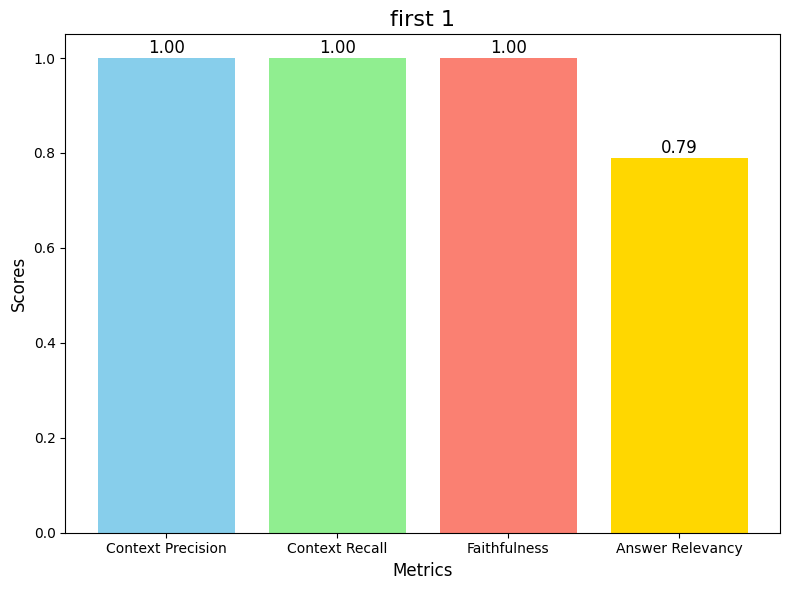

In [37]:
# 提取第一次問答的數據並進行可視化
first_run = df.iloc[0]  # 提取 DataFrame 的第一行

# 分別獲取第一次問答的 context_precision, context_recall, faithfulness, answer_relevancy
context_precision = first_run["context_precision"]
context_recall = first_run["context_recall"]
faithfulness = first_run["faithfulness"]
answer_relevancy = first_run["answer_relevancy"]

# 將數據轉換為列表進行可視化
metrics = ["Context Precision", "Context Recall", "Faithfulness", "Answer Relevancy"]
scores = [context_precision, context_recall, faithfulness, answer_relevancy]

# 創建條形圖
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=["skyblue", "lightgreen", "salmon", "gold"])

# 添加標題和標籤
plt.title("first 1", fontsize=16)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Scores", fontsize=12)

# 顯示每個條形圖上的分數
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=12)

# 顯示圖表
plt.tight_layout()
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

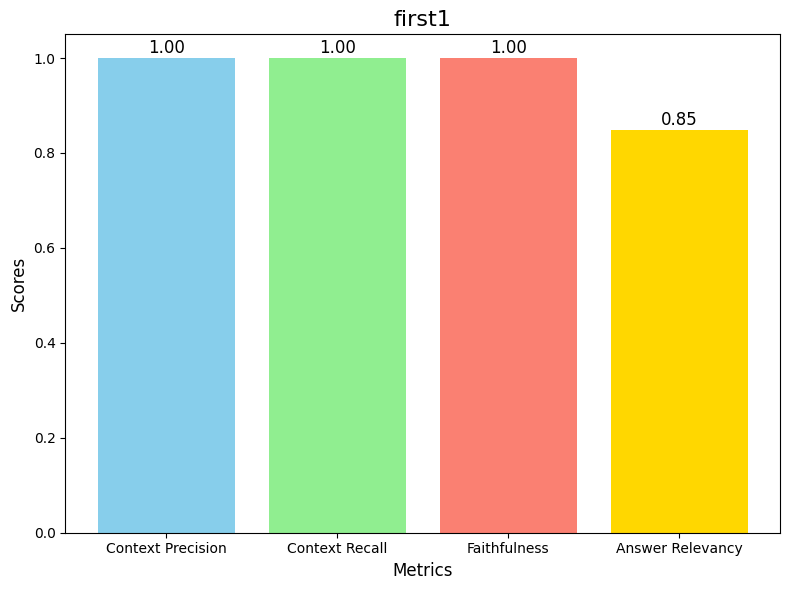

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

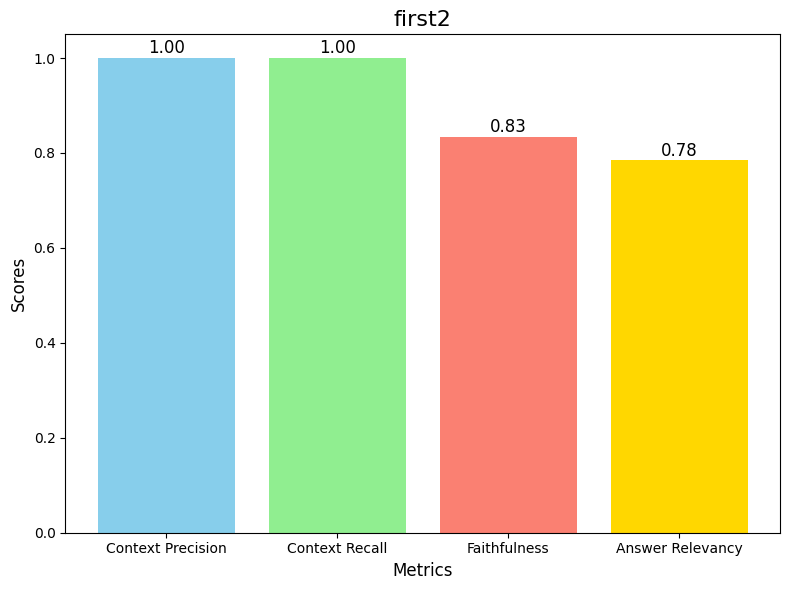

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

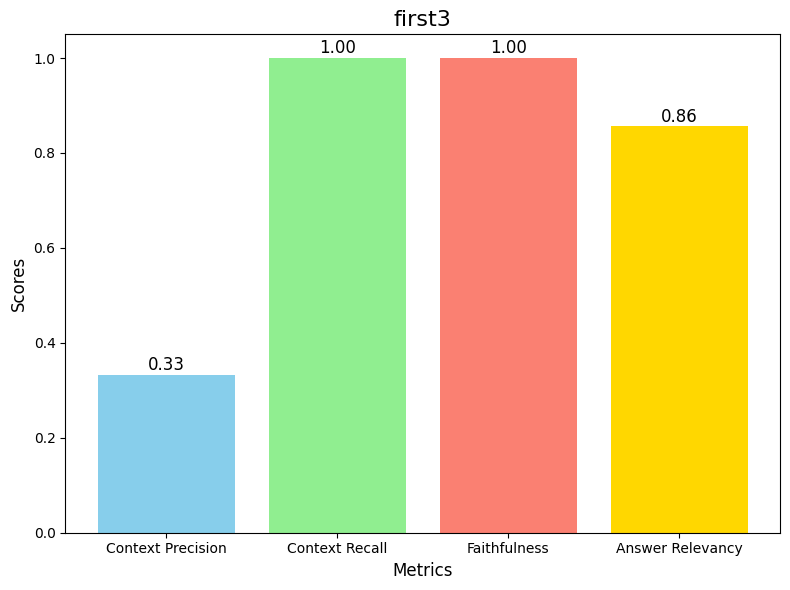

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

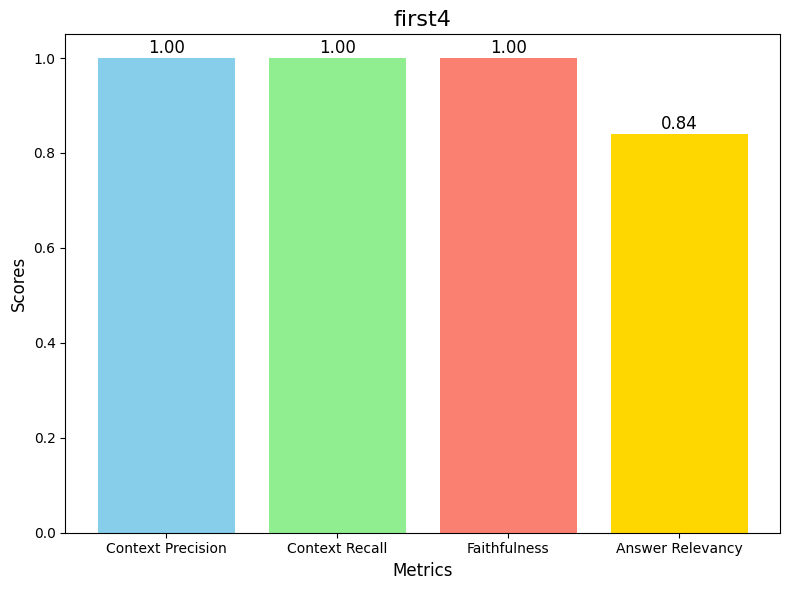

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

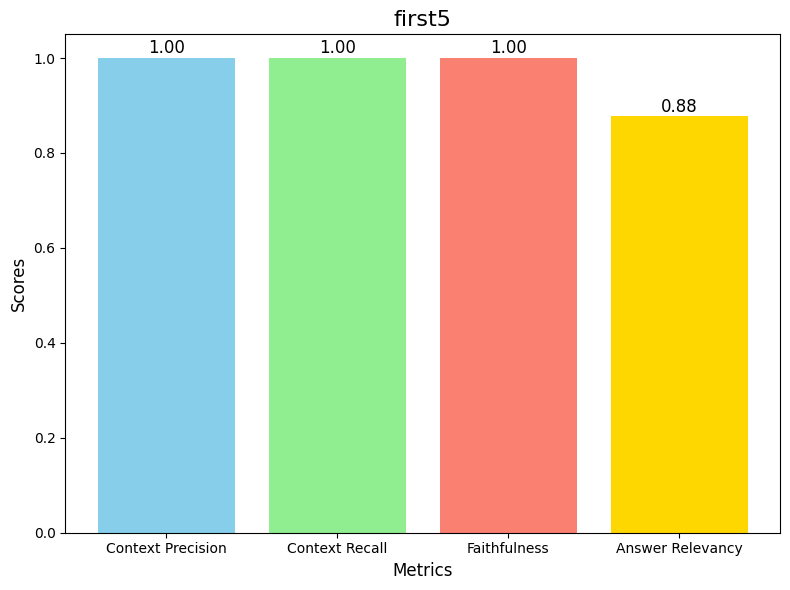

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

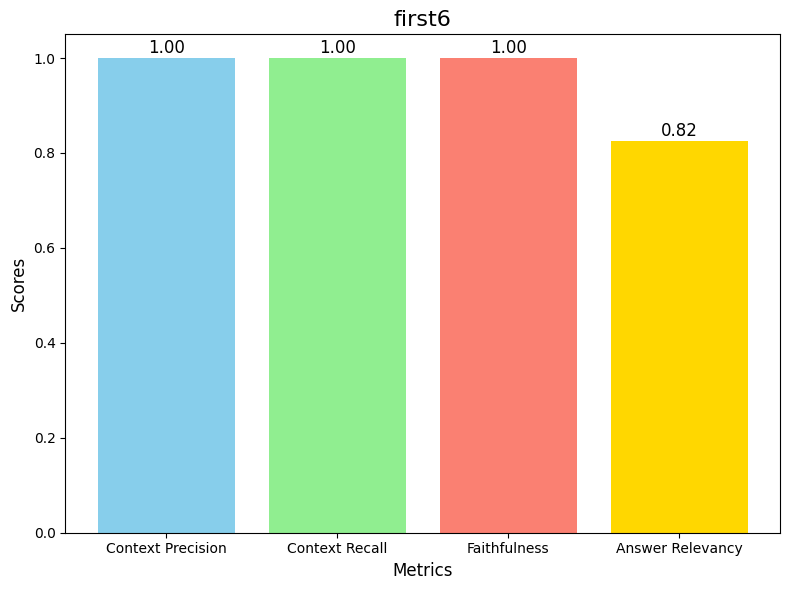

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

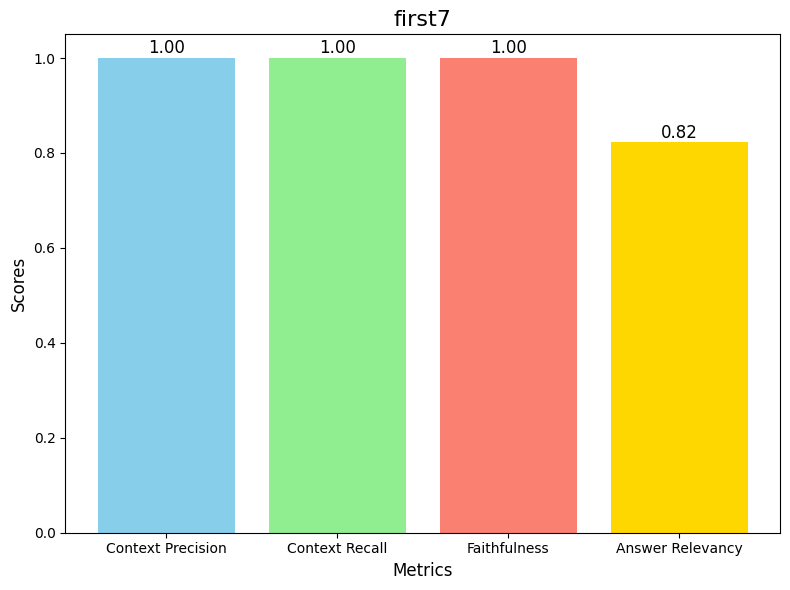

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

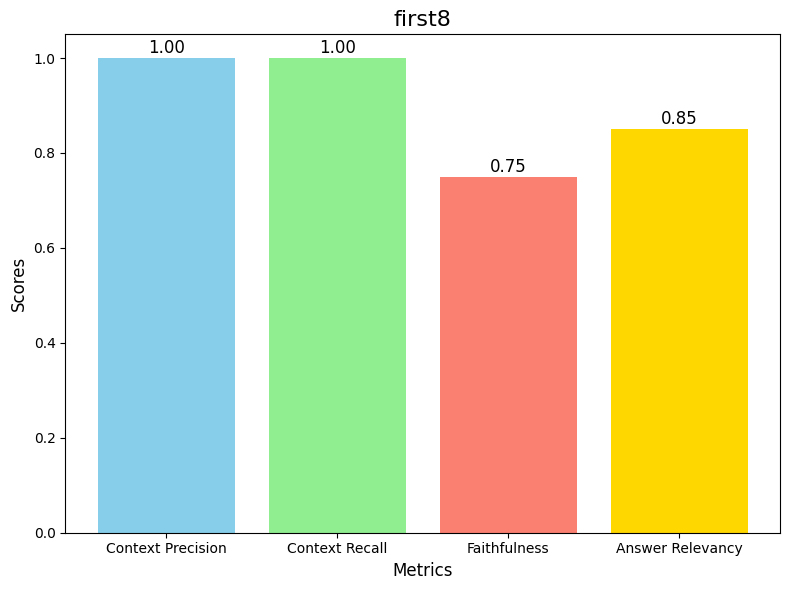

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

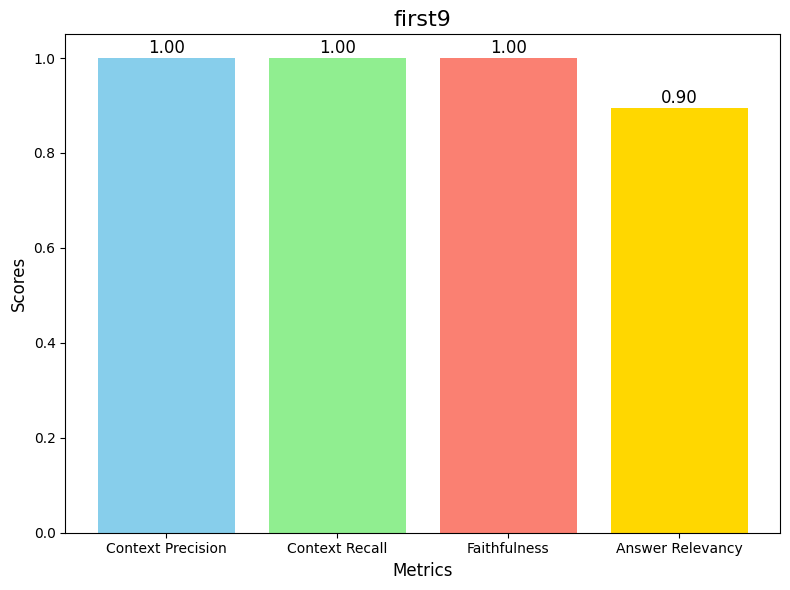

In [40]:
for i in range(1,10):
        # 提取第一次問答的數據並進行可視化
    first_run = df.iloc[i]  # 提取 DataFrame 的第一行

    # 分別獲取第一次問答的 context_precision, context_recall, faithfulness, answer_relevancy
    context_precision = first_run["context_precision"]
    context_recall = first_run["context_recall"]
    faithfulness = first_run["faithfulness"]
    answer_relevancy = first_run["answer_relevancy"]

    # 將數據轉換為列表進行可視化
    metrics = ["Context Precision", "Context Recall", "Faithfulness", "Answer Relevancy"]
    scores = [context_precision, context_recall, faithfulness, answer_relevancy]

    # 創建條形圖
    plt.figure(figsize=(8, 6))
    plt.bar(metrics, scores, color=["skyblue", "lightgreen", "salmon", "gold"])

    # 添加標題和標籤
    plt.title(f"first{i}", fontsize=16)
    plt.xlabel("Metrics", fontsize=12)
    plt.ylabel("Scores", fontsize=12)

    # 顯示每個條形圖上的分數
    for i, v in enumerate(scores):
        plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=12)

    # 顯示圖表
    plt.tight_layout()
    plt.show()


In [41]:
json_output = df.to_json(orient='records', force_ascii=False)
print(json_output)

[{"user_input":"恐龙是怎么被命名的？","retrieved_contexts":["恐龙（一类主要生活在中生代的蜥形纲动物）_百度百科 网页新闻贴吧知道网盘图片视频地图文库资讯采购百科百度首页登录注册进入词条全站搜索帮助首页秒懂百科特色百科知识专题加入百科百科团队权威合作个人中心恐龙[kǒng lóng]播报讨论上传视频一类主要生活在中生代的蜥形纲动物展开29个同名词条收藏查看我的收藏0有用+10本词条由“科普中国”科学百科词条编写与应用工作项目 审核 。恐龙（英文名：Dinosaur），是指三角龙、现代鸟类和梁龙最近的共同祖先及其所有后代。 [1]为方便研究，恐龙可分为鸟类和非鸟恐龙。其中，非鸟恐龙只生活在中生代（三叠纪、侏罗纪和白垩纪），已于6500万年前全部灭绝。而本词条主要介绍非鸟恐龙。 [1]矫健的四肢、长长的尾巴和庞大的身躯是部分非鸟恐龙的写照。它们主要栖息于湖岸平原（或海岸平原）上的森林地或开阔地带。1841年，英国科学家理查德·欧文在研究几块样子像蜥蜴骨头化石时，认为它们是某种史前动物留下来的，并命名为恐龙，意思是“恐怖的蜥蜴”。 [15]1915年，美国加利福尼亚大学地质学家乔治·D·劳德伯克博士和R·R·莫斯博士在自贡市发现恐龙化石。 [19] [22]2022年3月，云南大学生命科学院的脊椎动物研究团队发现科氏玉溪龙，是在亚洲发现的迄今最早的有甲类恐龙。 [16]中文名恐龙别    名恐怖的蜥蜴拉丁学名Dinosauria界动物界门脊索动物门亚    门脊椎动物亚门纲蜥形纲亚    纲双孔亚纲目鸟臀目（Ornithischuia)、蜥臀目(Saurischia)次亚纲主龙型次亚纲超    目恐龙总目生存时间中晚三叠世至白垩纪末词    源日本古生物学家译为恐竜目录1物种定义2名称释义3外形特征4生活习性5生长繁殖6主要分类7化石研究8灭绝原因9相关场馆物种定义播报编辑根据中国古生物学名词审定委员会给出的定义，恐龙指的是三角龙（鸟臀目）和现代鸟类（蜥臀目）最近的共同祖先的其全部后代，除鸟类外已经全部灭绝。 [1]名称释义播报编辑恐龙“恐龙”一词在西方指恐蜥（恐怖的蜥蜴），日本的古生物学家译为“恐竜”，后来流行于中国。古希腊语蜥蜴（Saurosc），特指一些巨大的有四肢有尾或兼有翼的类似蜥蜴的爬虫。","[1]名称释义播报编辑恐龙

In [42]:
df.to_json('output.json', orient='records', force_ascii=False)

print("JSON 檔案已成功儲存！")

JSON 檔案已成功儲存！


In [43]:
df.to_json('output.json', orient='columns', force_ascii=False)

print("JSON 檔案已成功儲存！")

JSON 檔案已成功儲存！


In [58]:
import os
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    # context_entity_recall,
    # answer_correctness,
    answer_similarity

)

 
result = evaluate(
    dataset = dataset, 
    metrics=[
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,    
        # context_entity_recall,
        # answer_correctness,
        answer_similarity
    ],
)

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\_context_precision.py:147: DeprecationWarning: The function _ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextPrecisionWithReference instead.
  return await self._ascore(row, callbacks)
D:\RAGAS\ragas\src\ragas\metrics\_context_recall.py:187: DeprecationWarning: The function _ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  return await self._ascore(row, callbacks)
D

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 
df = result.to_pandas()
df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,semantic_similarity
0,恐龙是怎么被命名的？,[恐龙（一类主要生活在中生代的蜥形纲动物）_百度百科 网页新闻贴吧知道网盘图片视频地图文库资...,恐龙的命名源于1842年英国科学家理查德·欧文，他用拉丁文创造了“Dinosauria”这一...,1841年，英国科学家理查德·欧文在研究几块样子像蜥蜴骨头化石时，认为它们是某种史前动物留下...,1.000000,1.000000,1.000000,0.814826,0.930023
1,恐龙怎么分类的？,"[Family Diplodocidae Marsh, 1884巨龙亚科 Subfamily...",恐龙的分类主要基于其骨骼结构和生物学特征。它们被分为两大类：鸟臀目（Ornithischia...,恐龙可分为鸟类和非鸟恐龙。,1.000000,0.000000,0.571429,0.830246,0.914128
2,体型最大的是哪种恐龙?,[[5]那些体形更小的、行动迅速的恐龙则进化出了一种在现代动物身上也可以看到的特点：薄壁长骨...,体型最大的是长颈巨龙（Giraffatitan brancai），其预期活体重量在30到60...,恐龙整体而言的体型很大。以恐龙作为标准来看，蜥脚下目是其中的巨无霸。,1.000000,1.000000,1.000000,0.800812,0.921028
3,体型最长的是哪种恐龙？它在哪里被发现？,"[Dong, 1995⊙短棘南雄龙 Nanshiungosaurus brevisinus ...",体型最长的恐龙是梁龙，长达27米。它的化石于1907年在美国怀俄明州被发现。,最长的恐龙是27米长的梁龙，是在1907年发现于美国怀俄明州。,0.333333,1.000000,1.000000,0.856552,0.964317
4,恐龙采样什么样的方式繁殖？,[[8]鸭嘴龙类恐龙图片集粹(31张)草食性恐龙一般会有一些特殊的“装备”来对付肉食性恐龙的...,恐龙主要通过产卵的方式繁殖，属于羊膜卵。科学家发现了恐龙的巢和蛋，证实了它们在繁殖时聚集在一...,恐龙采样产卵、孵蛋的方式繁殖。,1.000000,0.000000,1.000000,0.840141,0.915528
5,恐龙是冷血动物吗？,[[19]1993年7月，河南西峡恐龙蛋化石群的发现轰动世界。南阳盆地的恐龙蛋化石群种类多、...,恐龙并不是典型的冷血动物，而是介于冷血和温血之间的动物。研究表明，恐龙的生长和新陈代谢速率与...,恐龙是介于冷血和温血之间的动物,1.000000,1.000000,1.000000,0.830362,0.936540
6,陨石撞击是导致恐龙灭绝的原因吗？,[[12]这场大灭绝使得在距今约6500万年这个时间的前后，地球上生物世界的面貌发生了根本性...,陨石撞击被广泛认为是导致恐龙灭绝的主要原因之一。科学家们发现6500万年前的地层中铱的浓度异...,科学家最新研究显示，0.65亿年前小行星碰撞地球时间或早或晚都可能不会导致恐龙灭绝，真实灭绝...,1.000000,0.000000,1.000000,0.822045,0.898754
7,恐龙是在什么时候灭绝的？,[[12]中生代的鸟类（鸟类是一种特殊恐龙）(19张)地球岩层中的生物遗迹揭示，在生物进化史...,恐龙灭绝发生在距今约6500万年前，地质年代为中生代白垩纪末期。此次大灭绝不仅导致了恐龙的消...,恐龙灭绝的时间是在距今约6500万年前，地质年代为中生代白垩纪末或新生代第三纪初。,1.000000,1.000000,1.000000,0.825892,0.969270
8,鳄鱼是恐龙的近亲吗？,[[19]1993年7月，河南西峡恐龙蛋化石群的发现轰动世界。南阳盆地的恐龙蛋化石群种类多、...,是的，鳄鱼是恐龙的近亲。它们与恐龙同属初龙类演化支，尽管关系比非鸟恐龙与鸟类要远。两者在进化...,鳄鱼是另一群恐龙的现代近亲，但两者关系较非鸟恐龙与鸟类远。,1.000000,1.000000,0.800000,0.850344,0.938787
9,恐龙在英语中叫什么？,[恐龙（一类主要生活在中生代的蜥形纲动物）_百度百科 网页新闻贴吧知道网盘图片视频地图文库资...,"恐龙在英语中叫 ""Dinosaur""。这个词源自拉丁文，意为“恐怖的蜥蜴”。恐龙是一类主要生...",1842年，英国古生物学家理查德·欧文创建了“dinosaur”这一名词。英文的dinosa...,1.000000,0.666667,1.000000,0.877479,0.934909


In [67]:
import os
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    context_entity_recall,
    # answer_correctness,
    answer_similarity

)

 
result = evaluate(
    dataset = dataset, 
    metrics=[
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,    
        context_entity_recall,
        # answer_correctness,
        answer_similarity
    ],
)

Evaluating:   0%|          | 0/60 [00:00<?, ?it/s]

D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\_context_recall.py:187: DeprecationWarning: The function _ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  return await self._ascore(row, callbacks)
D:\RAGAS\ragas\src\ragas\metrics\_context_precision.py:147: DeprecationWarning: The function _ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextPrecisionWithReference instead.
  return await self._ascore(row, callbacks)
D:\RAGAS\ragas\src\ragas\metrics\_context_precision.py:147: DeprecationWarning: The function _ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextPrecisionWithReference instead.
  return await self._ascore(row, callbacks)
D:

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 
df = result.to_pandas()
df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,context_entity_recall,semantic_similarity
0,恐龙是怎么被命名的？,[恐龙（一类主要生活在中生代的蜥形纲动物）_百度百科 网页新闻贴吧知道网盘图片视频地图文库资...,恐龙的命名源于1842年英国科学家理查德·欧文，他用拉丁文创造了“Dinosauria”这一...,1841年，英国科学家理查德·欧文在研究几块样子像蜥蜴骨头化石时，认为它们是某种史前动物留下...,1.000000,1.000000,1.000000,0.814826,0.600000,0.930023
1,恐龙怎么分类的？,"[Family Diplodocidae Marsh, 1884巨龙亚科 Subfamily...",恐龙的分类主要基于其骨骼结构和生物学特征。它们被分为两大类：鸟臀目（Ornithischia...,恐龙可分为鸟类和非鸟恐龙。,1.000000,0.000000,0.571429,0.916369,0.000000,0.914128
2,体型最大的是哪种恐龙?,[[5]那些体形更小的、行动迅速的恐龙则进化出了一种在现代动物身上也可以看到的特点：薄壁长骨...,体型最大的是长颈巨龙（Giraffatitan brancai），其预期活体重量在30到60...,恐龙整体而言的体型很大。以恐龙作为标准来看，蜥脚下目是其中的巨无霸。,1.000000,1.000000,1.000000,0.800812,0.500000,0.921028
3,体型最长的是哪种恐龙？它在哪里被发现？,"[Dong, 1995⊙短棘南雄龙 Nanshiungosaurus brevisinus ...",体型最长的恐龙是梁龙，长达27米。它的化石于1907年在美国怀俄明州被发现。,最长的恐龙是27米长的梁龙，是在1907年发现于美国怀俄明州。,0.333333,1.000000,1.000000,0.856438,0.200000,0.964317
4,恐龙采样什么样的方式繁殖？,[[8]鸭嘴龙类恐龙图片集粹(31张)草食性恐龙一般会有一些特殊的“装备”来对付肉食性恐龙的...,恐龙主要通过产卵的方式繁殖，属于羊膜卵。科学家发现了恐龙的巢和蛋，证实了它们在繁殖时聚集在一...,恐龙采样产卵、孵蛋的方式繁殖。,1.000000,0.000000,1.000000,0.840141,0.000000,0.915528
5,恐龙是冷血动物吗？,[[19]1993年7月，河南西峡恐龙蛋化石群的发现轰动世界。南阳盆地的恐龙蛋化石群种类多、...,恐龙并不是典型的冷血动物，而是介于冷血和温血之间的动物。研究表明，恐龙的生长和新陈代谢速率与...,恐龙是介于冷血和温血之间的动物,1.000000,1.000000,1.000000,0.843335,0.000000,0.936540
6,陨石撞击是导致恐龙灭绝的原因吗？,[[12]这场大灭绝使得在距今约6500万年这个时间的前后，地球上生物世界的面貌发生了根本性...,陨石撞击被广泛认为是导致恐龙灭绝的主要原因之一。科学家们发现6500万年前的地层中铱的浓度异...,科学家最新研究显示，0.65亿年前小行星碰撞地球时间或早或晚都可能不会导致恐龙灭绝，真实灭绝...,1.000000,0.000000,1.000000,0.822045,0.285714,0.898754
7,恐龙是在什么时候灭绝的？,[[12]中生代的鸟类（鸟类是一种特殊恐龙）(19张)地球岩层中的生物遗迹揭示，在生物进化史...,恐龙灭绝发生在距今约6500万年前，地质年代为中生代白垩纪末期。此次大灭绝不仅导致了恐龙的消...,恐龙灭绝的时间是在距今约6500万年前，地质年代为中生代白垩纪末或新生代第三纪初。,1.000000,1.000000,1.000000,0.830024,0.500000,0.969177
8,鳄鱼是恐龙的近亲吗？,[[19]1993年7月，河南西峡恐龙蛋化石群的发现轰动世界。南阳盆地的恐龙蛋化石群种类多、...,是的，鳄鱼是恐龙的近亲。它们与恐龙同属初龙类演化支，尽管关系比非鸟恐龙与鸟类要远。两者在进化...,鳄鱼是另一群恐龙的现代近亲，但两者关系较非鸟恐龙与鸟类远。,1.000000,1.000000,0.800000,0.850344,0.250000,0.938762
9,恐龙在英语中叫什么？,[恐龙（一类主要生活在中生代的蜥形纲动物）_百度百科 网页新闻贴吧知道网盘图片视频地图文库资...,"恐龙在英语中叫 ""Dinosaur""。这个词源自拉丁文，意为“恐怖的蜥蜴”。恐龙是一类主要生...",1842年，英国古生物学家理查德·欧文创建了“dinosaur”这一名词。英文的dinosa...,1.000000,0.666667,1.000000,0.895302,0.222222,0.934909


In [64]:
df.to_json('output.json', orient='records', force_ascii=False)

print("JSON 檔案已成功儲存！")

JSON 檔案已成功儲存！


In [65]:
df.to_json('output.json', orient='records', force_ascii=False)

print("JSON 檔案已成功儲存！")

JSON 檔案已成功儲存！


In [66]:
df = pd.DataFrame(data)

# 將 DataFrame 輸出為 Excel 檔案
df.to_excel('output.xlsx', index=False)

print("Excel 檔案已成功儲存！")

Excel 檔案已成功儲存！


In [68]:
df = result.to_pandas()
df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,context_entity_recall,semantic_similarity
0,恐龙是怎么被命名的？,[恐龙（一类主要生活在中生代的蜥形纲动物）_百度百科 网页新闻贴吧知道网盘图片视频地图文库资...,恐龙的命名源于1842年英国科学家理查德·欧文，他用拉丁文创造了“Dinosauria”这一...,1841年，英国科学家理查德·欧文在研究几块样子像蜥蜴骨头化石时，认为它们是某种史前动物留下...,1.000000,1.000000,1.000000,0.812764,0.500000,0.930023
1,恐龙怎么分类的？,"[Family Diplodocidae Marsh, 1884巨龙亚科 Subfamily...",恐龙的分类主要基于其骨骼结构和生物学特征。它们被分为两大类：鸟臀目（Ornithischia...,恐龙可分为鸟类和非鸟恐龙。,1.000000,0.000000,0.571429,0.828794,0.000000,0.914128
2,体型最大的是哪种恐龙?,[[5]那些体形更小的、行动迅速的恐龙则进化出了一种在现代动物身上也可以看到的特点：薄壁长骨...,体型最大的是长颈巨龙（Giraffatitan brancai），其预期活体重量在30到60...,恐龙整体而言的体型很大。以恐龙作为标准来看，蜥脚下目是其中的巨无霸。,1.000000,1.000000,1.000000,0.796267,0.500000,0.920939
3,体型最长的是哪种恐龙？它在哪里被发现？,"[Dong, 1995⊙短棘南雄龙 Nanshiungosaurus brevisinus ...",体型最长的恐龙是梁龙，长达27米。它的化石于1907年在美国怀俄明州被发现。,最长的恐龙是27米长的梁龙，是在1907年发现于美国怀俄明州。,0.333333,1.000000,1.000000,0.856438,0.200000,0.964317
4,恐龙采样什么样的方式繁殖？,[[8]鸭嘴龙类恐龙图片集粹(31张)草食性恐龙一般会有一些特殊的“装备”来对付肉食性恐龙的...,恐龙主要通过产卵的方式繁殖，属于羊膜卵。科学家发现了恐龙的巢和蛋，证实了它们在繁殖时聚集在一...,恐龙采样产卵、孵蛋的方式繁殖。,1.000000,1.000000,1.000000,0.840141,0.000000,0.915528
5,恐龙是冷血动物吗？,[[19]1993年7月，河南西峡恐龙蛋化石群的发现轰动世界。南阳盆地的恐龙蛋化石群种类多、...,恐龙并不是典型的冷血动物，而是介于冷血和温血之间的动物。研究表明，恐龙的生长和新陈代谢速率与...,恐龙是介于冷血和温血之间的动物,1.000000,1.000000,1.000000,0.830362,0.000000,0.936540
6,陨石撞击是导致恐龙灭绝的原因吗？,[[12]这场大灭绝使得在距今约6500万年这个时间的前后，地球上生物世界的面貌发生了根本性...,陨石撞击被广泛认为是导致恐龙灭绝的主要原因之一。科学家们发现6500万年前的地层中铱的浓度异...,科学家最新研究显示，0.65亿年前小行星碰撞地球时间或早或晚都可能不会导致恐龙灭绝，真实灭绝...,1.000000,0.000000,1.000000,0.822060,0.285714,0.898754
7,恐龙是在什么时候灭绝的？,[[12]中生代的鸟类（鸟类是一种特殊恐龙）(19张)地球岩层中的生物遗迹揭示，在生物进化史...,恐龙灭绝发生在距今约6500万年前，地质年代为中生代白垩纪末期。此次大灭绝不仅导致了恐龙的消...,恐龙灭绝的时间是在距今约6500万年前，地质年代为中生代白垩纪末或新生代第三纪初。,1.000000,1.000000,1.000000,0.825892,0.500000,0.969177
8,鳄鱼是恐龙的近亲吗？,[[19]1993年7月，河南西峡恐龙蛋化石群的发现轰动世界。南阳盆地的恐龙蛋化石群种类多、...,是的，鳄鱼是恐龙的近亲。它们与恐龙同属初龙类演化支，尽管关系比非鸟恐龙与鸟类要远。两者在进化...,鳄鱼是另一群恐龙的现代近亲，但两者关系较非鸟恐龙与鸟类远。,1.000000,1.000000,0.800000,0.850344,0.250000,0.938762
9,恐龙在英语中叫什么？,[恐龙（一类主要生活在中生代的蜥形纲动物）_百度百科 网页新闻贴吧知道网盘图片视频地图文库资...,"恐龙在英语中叫 ""Dinosaur""。这个词源自拉丁文，意为“恐怖的蜥蜴”。恐龙是一类主要生...",1842年，英国古生物学家理查德·欧文创建了“dinosaur”这一名词。英文的dinosa...,1.000000,0.666667,1.000000,0.895302,0.181818,0.934909


In [70]:
df.to_excel('out.xlsx', index=False)

print("Excel 檔案已成功儲存！")

Excel 檔案已成功儲存！


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Evaluation Metrics Over 10 Runs", fontsize=16)
# 設置 x 軸為 1 到 10
x_range = range(0, 11)
# y_range = range(1, 11)
# 繪製每個特性的折線圖
df["context_precision"].plot(ax=axes[0, 0], title="Context Precision", color="skyblue",xticks=x_range)
df["context_recall"].plot(ax=axes[0, 1], title="Context Recall", color="lightgreen",xticks=x_range)
df["faithfulness"].plot(ax=axes[1, 0], title="Faithfulness", color="salmon",xticks=x_range)
df["answer_relevancy"].plot(ax=axes[1, 1], title="Answer Relevancy", color="gold",xticks=x_range)
df["context_entity_recall"].plot(ax=axes[1, 1], title="Answer Relevancy", color="gold",xticks=x_range)
df["semantic_similarity"].plot(ax=axes[1, 1], title="Answer Relevancy", color="gold",xticks=x_range)


# 設置標籤
for ax in axes.flat:
    ax.set_xlabel("Run")
    ax.set_ylabel("Score")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()